# 18.06 Pset 1

Due Friday Sep 16 at 11am on Gradescope.  Submit in PDF format: a decent-quality **scan/image** of any handwritten solutions (e.g. get a scanner app on your phone or use a tablet), and a PDF printout of your Jupyter notebook showing your code and (clearly labeled) results.

## Problem 1 (15 points)

Suppose $A$ is a $3 \times 3$ matrix, $B$ is a $2 \times 3$ matrix, $x$ is a 3-component column vector, and $y$ is a $2$-component column vector.

What is the **shape** of the output (e.g. scalar, $4\times 3$ matrix, 5-component column vector, etcetera) of the following operations, or say **nonsense** if the operation doesn't make sense.

1. $A B$
2. $B A$
3. $A B y$
4. $B A x$
5. $y^T A x$
6. $y^T B x$
7. $x^T y$
8. $y x^T$
9. $yx$
10. $A^2 = AA$
11. $B^2 = BB$
12. $\frac{x}{A}$
13. $\frac{x}{x}$
14. $\frac{x}{3}$
15. $\frac{B}{3}$

## Problem 2 (3+3+3+3+3 points)

Given a function $f(x)$, we can *sample* it at $n$ equally spaced points $x_1 = a, x_2 = a+\Delta x, x_3 = a+2\Delta x, \ldots, x_n = a+(n-1)\Delta x = b$ from $a$ to $b$ to obtain a column vector
$$
\vec{f} = \begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix} = \begin{pmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{pmatrix} \, ,
$$
where $f_k = f(x_k) = f(a + (k-1)\Delta x)$.

**(a)** An *approximate derivative* of $f(x)$ (called a [finite-difference approximation](https://en.wikipedia.org/wiki/Finite_difference)) is given by the *difference* operation:
$$
D\vec{f} = \frac{1}{\Delta x} \begin{pmatrix} f_2 - f_1 \\ f_3 - f_2 \\ \vdots \\ f_n - f_{n-1} \end{pmatrix}
$$
Write down this linear operator $D$ as a matrix (what size?) for $n=5$.

**(b)** Construct the *same* $D$ matrix in Julia, for $\Delta x = 1$, using the [`diagm` function](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.diagm) to build matrices out of diagonal entries, and the [`fill` function](https://docs.julialang.org/en/v1/base/arrays/#Base.fill) to make vectors filled with constants.  For example, this is a $6 \times 8$ matrix with 1's, 4's, and 7's on three diagonals:

In [2]:
using LinearAlgebra
diagm(6,8, 0 => fill(1,6), 1 => fill(4,6), -2 => fill(7,4))

6×8 Matrix{Int64}:
 1  4  0  0  0  0  0  0
 0  1  4  0  0  0  0  0
 7  0  1  4  0  0  0  0
 0  7  0  1  4  0  0  0
 0  0  7  0  1  4  0  0
 0  0  0  7  0  1  4  0

In [3]:
D = diagm(4, 5, 0=>fill(-1, 4), 1=>fill(1, 4)) # FILL IN YOUR CODE HERE

4×5 Matrix{Int64}:
 -1   1   0   0  0
  0  -1   1   0  0
  0   0  -1   1  0
  0   0   0  -1  1

**(c)** Use your same code to construct a $D$ matrix for $n=100$ and apply it to approximately differentate $f(x) = \sin(x)$ for $a,b = 0,5$, and plot your result using the code below.  It should look like a cosine!

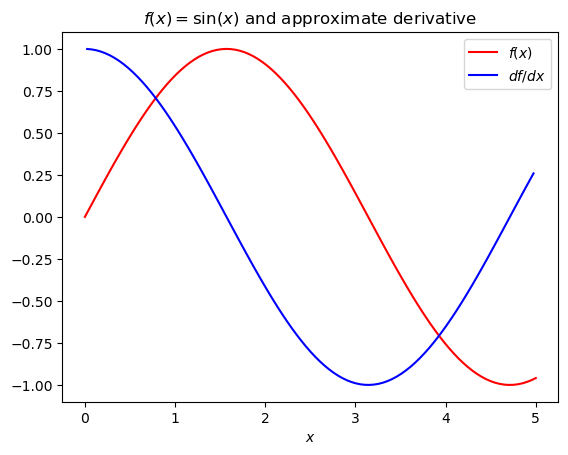

PyObject <matplotlib.legend.Legend object at 0x1482cf010>

In [4]:
a, b = 0, 5
n = 100
Δx = (b - a) / (n - 1) # spacing for n points from a to b

x = range(a, b, length=n) # array of n points from a to b
f = sin.(x) # apply sin(x) elementwise to the vector x

D = diagm(n-1, n, 0=>fill(-1/Δx, n-1), 1=>fill(1/Δx, n-1)) # FILL IN YOUR CODE HERE # FILL IN YOUR CODE HERE

# plot f and D*f
using PyPlot
plot(x, f, "r-")
plot(x[1:end-1] .+ Δx/2, D*f, "b-")

title(L"$f(x) = \sin(x)$ and approximate derivative")
xlabel(L"x")
legend([L"f(x)", L"df/dx"])

**(d)** An *approximate integral* of a function $g(x)$ sampled at $m$ points with spacing $\Delta x$ is given by a *sum*:
$$
S \vec{g} = S \underbrace{\begin{pmatrix} g_1 \\ g_2 \\ \vdots \\ g_m \end{pmatrix}}_g = (g_1 + g_2 + \cdots g_m) \Delta x \, ,
$$
where $g_k = g(x_k)$ similar to $\vec{f}$.  Write the linear operator $S$ as a matrix for $m=6$.

**(e)** What is the product $S D$ for $n=6$ and $m = \_\_\_\_$ (for the same $\Delta x$)?  (That is, the approximate "integral of the derivative" is what linear operator?)

## Problem 3 (5+5 points)

$B$ is a given $n \times n$ matrix, $y$ is a given $n$-component vector, and $x$ is an unknown $n$-component vector satisfying the equations:
$$
B(x - y) = \frac{x+y}{2}
$$

**(a)** Give a matrix $A$ (in terms of $B$ and/or the $n\times n$ identity matrix $I$) and a vector $b$ (in terms of $y$ and/or $B$) such that $x$ is a solution to $Ax = b$.   (That is, we want to rewrite our equations in "standard" form so that we can exploit existing algorithms.  Re-arrange the equation above so that all the terms involving $x$ are on one side and all of the known vectors are on the other side.)

**(b)** In Julia, $Ax = b$ can be solved with `x = A \ b`.  Check that your $A$ and $b$ from part (a) are correct (satisfy the original equation) on a random $5\times 5$ problem.  (Note: Julia has a built-in constant [`I`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.I) that denotes a context-dependent identity matrix, e.g. `A + 2I` in Julia computes $A + 2I$.)

In [5]:
B = randn(5,5) # a random 5×5 matrix
y = randn(5)   # a random 5-component vector

A = (B - 1/2 * I) # FILL IN YOUR CODE HERE from your answer in (a)
b = (B * y + y / 2) # FILL IN YOUR CODE HERE from your answer in (a)

x = A \ b # solve Ax=b

# check: does B(x - y) equal (x+y)/2 , up to roundoff errors?

B*(x - y) ≈ (x + y)/2 # ≈ is equality up to roundoff … should return "true"

true

## Problem 4 (5+5 points)

(From Strang, section 2.2, problem 14.) Consider Gaussian elimination on the following system of equations:

\begin{align}
2x + 5y + z &= 0 \\
4x + dy + z &= 2 \\
y - z &= 3
\end{align}

(Write your solution in matrix form.)

* What number $d$ forces you to do a row exchange during elimination, and what (non-singular) triangular system do you obtain for that $d$?
* What value of $d$ would make this system singular (no third pivot, i.e. no way to get a triangular system with 3 nonzero values on the diagonal)?

## Problem 5 (10 points)

(From Strang, section 2.2, problem 11.)

A system of linear equations Ax=b cannot have *exactly two* solutions. An easy way to see why: if two vectors x and y≠x are two solutions (i.e. Ax=b and Ay=b), what is another solution? (Hint: x+y is almost right.)

## Problem 6 (5+5+5 points)

Suppose we want to solve $Ax=b$ for **more than one right-hand side** $b$.  For example, suppose
$$
A = \begin{pmatrix} 1 & 6 & -3 \\ -2 & 3 & 4 \\ 1 & 0 & -2 \end{pmatrix}
$$
and want to solve *both* $Ax_1 = b_1$ and $Ax_2 = b_2$ for the right-hand sides:
$$
b_1 = \begin{pmatrix} 7 \\ 3 \\ 0 \end{pmatrix} \; b_2 = \begin{pmatrix} 0 \\ -2 \\ 1 \end{pmatrix}
$$

**(a)**

Explain why solving *both* $Ax_1 = b_1$ and $Ax_2 = b_2$ is equivalent to solving $AX = B$ where $X$ is an unknown *matrix* (of what shape?) and B is a given matrix on the right-hand-side.   Give $B$ explicitly, and relate $X$ to your desired solutions $x_1$ and $x_2$.

(Hint: how does matrix multiplication $AX$ relate to multiplying $A$ by each column of $X$?)

**(b)**

Solve your $AX=B$ equation by forming the augmented matrix $\begin{pmatrix} A & B\end{pmatrix}$, reducing it to upper-triangular form (once), and doing backsubstitution (twice) to obtain $X$ and hence $x_1$ and $x_2$.

**(c)**

You can solve $AX = B$ in Julia by the code `X = A \ B`.  The matrix $A$ is given below in Julia.   Enter the matrix $B$, compute `X = A \ B`, and verify that it matches the answer you computed by hand in (b).

In [6]:
A = [ 1  6 -3
     -2  3  4
      1  0 -2 ]

3×3 Matrix{Int64}:
  1  6  -3
 -2  3   4
  1  0  -2

In [7]:
B = [ 7 0 
      3 -2
      0 1 ]

3×2 Matrix{Int64}:
 7   0
 3  -2
 0   1

In [8]:
X = A \ B   # solve AX = B for X

3×2 Matrix{Float64}:
 -2.0   3.0
  1.0  -2.96059e-17
 -1.0   1.0